In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings as wn
wn.filterwarnings('ignore')

In [14]:
List=[]

In [15]:
df=pd.read_csv('50_Startups.csv')

In [16]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [19]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [20]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


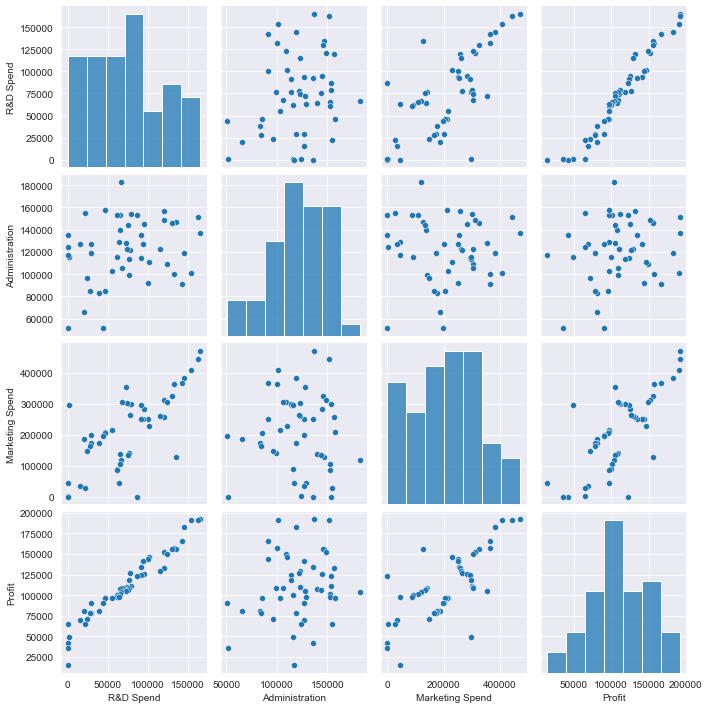

In [22]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [23]:
df1=df.drop(['Profit'],axis=1)

In [24]:
df1=pd.get_dummies(df1)
df1.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [25]:
x=df1

In [26]:
y=df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [27]:
y=pd.DataFrame(y,columns=['Profit'])

In [28]:
df2=pd.concat([x,y],axis=1)

In [29]:
df2.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


In [32]:
df2=df2.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'})

In [33]:
df2.head()

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


In [34]:
x=df2.iloc[:,0:6]
y=df2.iloc[:,-1:]

In [35]:
df2.head()

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


In [36]:
df2=df2.rename(columns={'State_New York':'State_NY'})

### Preparing a model 

In [273]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_NY',data=df2).fit()

In [274]:
model.params

Intercept           37633.233317
RD_Spend                0.806023
Administration         -0.027004
Marketing_Spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NY            12450.223495
dtype: float64

In [275]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.34e-27
Time:                        19:12:20   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NY          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.98e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [276]:
List.append(model.rsquared)

### Simple Linear regression models

In [277]:
import statsmodels.formula.api as smf
model_a=smf.ols('Profit~Administration+Marketing_Spend',data=df2).fit()

In [278]:
model_a.pvalues

Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64

In [180]:
import statsmodels.formula.api as smf
model_b=smf.ols('Profit~Administration',data=df2).fit()

In [218]:
model_b.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [182]:
import statsmodels.formula.api as smf
model_c=smf.ols('Profit~Marketing_Spend',data=df2).fit()

In [219]:
model_c.pvalues

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64

In [37]:
df2.head()

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_NY,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


### Calculating VIF

In [40]:
rsq_r = smf.ols('RD_Spend~Administration+Marketing_Spend',data=df2).fit().rsquared  
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols('Administration~RD_Spend+Marketing_Spend',data=df2).fit().rsquared  
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('Marketing_Spend~RD_Spend+Administration',data=df2).fit().rsquared  
vif_m = 1/(1-rsq_m)

d1 = {'Variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_r,vif_a,vif_m]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


### Detecting Inflencers

# High Influence points

In [124]:
from statsmodels.graphics.regressionplots import influence_plot

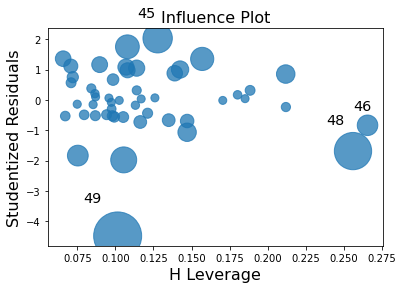

In [125]:
influence_plot(model)
plt.show()

# Cook's Distance 

In [126]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

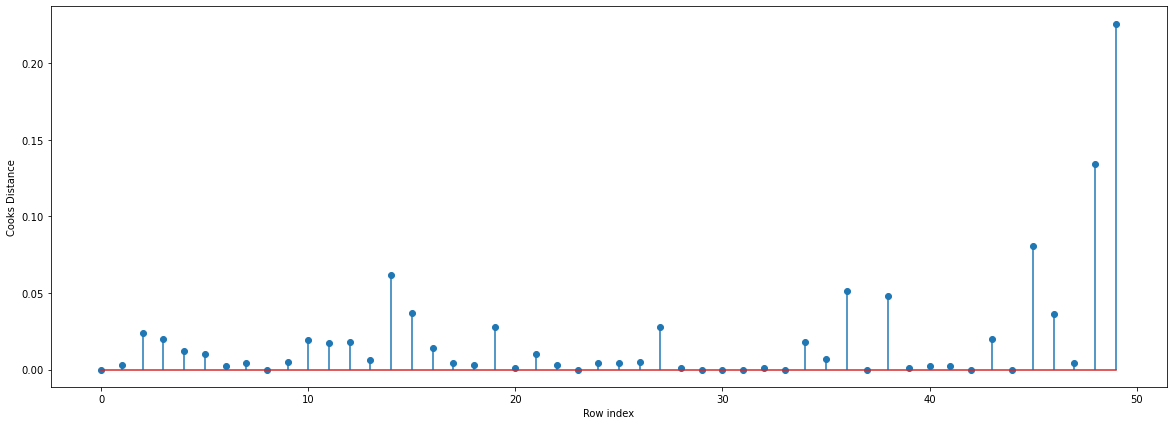

In [128]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [134]:
(np.argmax(c),np.max(c))

(49, 0.2262509450150925)

# Improving Model

In [280]:
df2[df2.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_NY,Profit
49,0.0,116983.8,45173.06,1,0,0,14681.4


In [281]:
fd=df2.drop(index=[49],axis=0)
fd.reset_index(inplace=True)

# Build Model

In [282]:
import statsmodels.formula.api as smf
model1=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_NY',data=fd).fit()

In [283]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           2.51e-29
Time:                        19:12:54   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
RD_Spend             0.7836      0.039     20.056      0.000       0.705       0.862
Administration      -0.0220      0.044     -0.505      0.616      -0.110       0.066
Marketing_Spend      0.0258      0.014      1.804      0.078      -0.003       0.055
State_California  1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
State_Florida     1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
State_NY          1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     4.59e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [284]:
List.append(model1.rsquared)

In [285]:
List

[0.9507524843355148, 0.9618082858227786]

# High Influence points

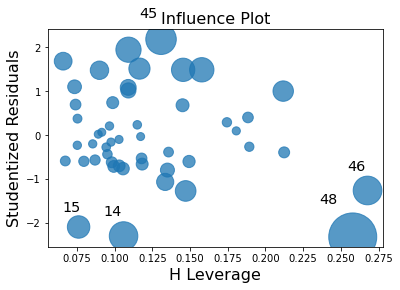

In [146]:
influence_plot(model1)
plt.show()

# Cook's Distance

In [147]:
model_influence1 = model1.get_influence()
(c1, _) = model_influence1.cooks_distance

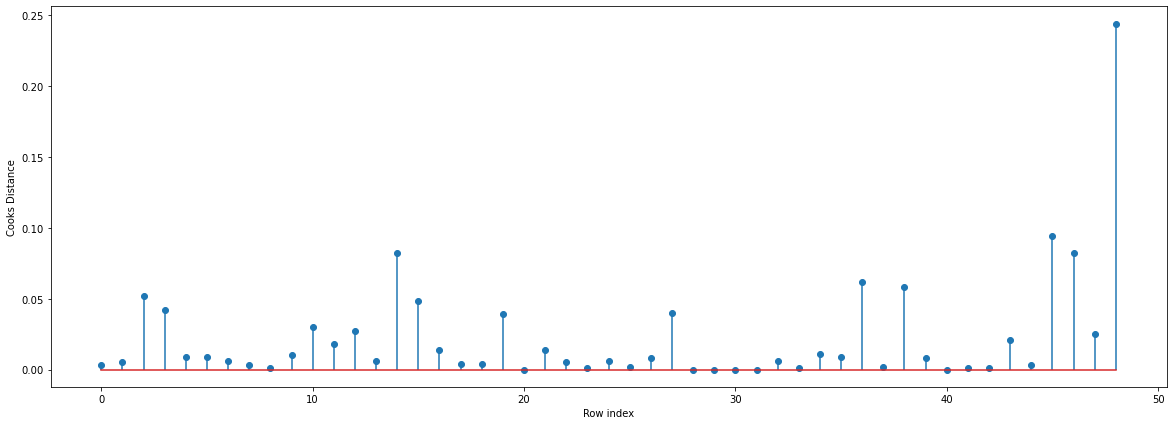

In [148]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(fd)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [149]:
(np.argmax(c1),np.max(c1))

(48, 0.2435281757140357)

# Improving Model

In [286]:
fd[fd.index.isin([48])]

,index,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_NY,Profit
48,48,542.05,51743.15,0.0,0,0,1,35673.41


In [287]:
fd1=fd.drop(index=[48],axis=0)
fd1.reset_index(inplace=True)

# Build Model

In [288]:
import statsmodels.formula.api as smf
model2=smf.ols('Profit~RD_Spend+Marketing_Spend+State_California+State_Florida+State_NY',data=fd1).fit()

In [293]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.02e-29
Time:                        19:13:32   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          3.83e+04   1841.077     20.803      0.000    3.46e+04     4.2e+04
RD_Spend             0.7692      0.035     22.072      0.000       0.699       0.840
Marketing_Spend      0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  1.353e+04   1599.496      8.461      0.000    1.03e+04    1.68e+04
State_Florida     1.216e+04   1761.727      6.904      0.000    8609.549    1.57e+04
State_NY           1.26e+04   1685.592      7.478      0.000    9204.975     1.6e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.46e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [289]:
List.append(model2.rsquared)

In [290]:
RSq=pd.DataFrame(List,columns=['RSquared'])

In [291]:
RSq

,RSquared
0,0.950752
1,0.961808
2,0.961149


In [157]:
list_indexes=[1,2,3]
ind=pd.DataFrame(list_indexes,columns=['Iteration'])

In [158]:
ind

,Iteration
0,1
1,2
2,3


In [159]:
ind['RSquared']=RSq['RSquared']

In [160]:
ind

,Iteration,RSquared
0,1,0.950752
1,2,0.961808
2,3,0.962837
